The goal of this notebook is to evaluate the method to generate persistence images used by [Zhao and Wang](https://papers.nips.cc/paper/9178-learning-metrics-for-persistence-based-summaries-and-applications-for-graph-classification.pdf).  

In their paper, they achieve very competitive classification performance on graph benchmark datasets, using only topological information of the graph and without using node and edge labels. Their method consists in generating persistence images of the graphs, learning a weighted kernel on those persistence images and applying this kernel to classify the graphs.  

Here, I show that the impressive performance of their method may be due more to the filtration they used to generate the persistence diagrams than to their weighted kernel. To that end, I classify the persistence images that they generated (available on [GitHub](https://github.com/topology474/WKPI)) with a simple linear SVM, and I show that I get even better results than what they report with their learnt weighted kernel.

In [1]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt

In [2]:
#Load persistant images (from Zhao and Wang) and labels
pimage_path = "Datasets/WKPI/proteinPDPI/proteinPI/"
images = [np.loadtxt(pimage_path + str(i) + "_PI.pdg") for i in range(len(os.listdir(pimage_path)) -2)]
y = np.loadtxt(pimage_path + "labels.txt")

In [4]:
#Evaluate Random Forest with nested cross-validation

scoring_metric = "accuracy"
param_grid = [
  { "n_estimators": [100], "max_depth":[5,15,40]}
]
clf=GridSearchCV(RandomForestClassifier(),param_grid=param_grid,scoring=scoring_metric,n_jobs=-1,cv=5)

mean_accuracies=[]
for i in range(10):
  clf = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,scoring = scoring_metric,n_jobs=-1,cv=5)
  scores = cross_val_score(clf,X=images,y=y,cv=10)
  mean_accuracies.append(np.mean(scores))
print("{:.1f}\u00B1{:.1f}".format(np.mean(mean_accuracies)*100,np.std(mean_accuracies)*100))

82.1±0.4


As a comparison, the best accuracy reported for the PROTEINS dataset in Table 2 of [Zhao and Wang](https://papers.nips.cc/paper/9178-learning-metrics-for-persistence-based-summaries-and-applications-for-graph-classification.pdf#page=9) was 78, and most methods had an accuracy of 75 for this dataset. So it seems that their method of generating the persistence images is able to capture very efficiently the information required to classify the graphs.

Zhao and Wang do not provide the code for how they generated the persistence diagrams and persistence images. They only mention that they used filtrations based on Jaccard index (for large graphs) or Ricci curvature (for small graphs), that they used both sublevels and superlevels filtrations (which results in some points having a lower death than birth) and that they used 0-dimensional and 1-dimensional persistence points. 

Below, I plot persistence images and diagrams of some graphs of the PROTEINS dataset, which they made available on [GitHub](https://github.com/topology474/WKPI).
In each row, the first 3 plots corresponds to one graph of class 0, and the next 3 plots correspond to one graph of class 1.

* The first plot is the persistence image of the graph, with the color range adapted to the image. It is possible that two different persistence images result in the same plot, for example if the values of one corresponds to the values of the other with an offset.

* The second plot is the persistence image of the graph, with a common color range for all images.

* The third plot corresponds to the persistence diagram of the graph.

The link between the persistence diagrams and the persistence images (if there is any) is not clear at all. This is quite curious, because the persistence image should essentially be a smoothed version of the persistence diagram (with weights, and possibly with some transformations, like using (birth, persistence) coordinates instead of (birth, death)). 

Most persistence images appear to have a similar "background" (with different offsets), but a large proportion of the images of class 0 have a very noticeable pattern (4 "puzzle pieces"). This is very curious.

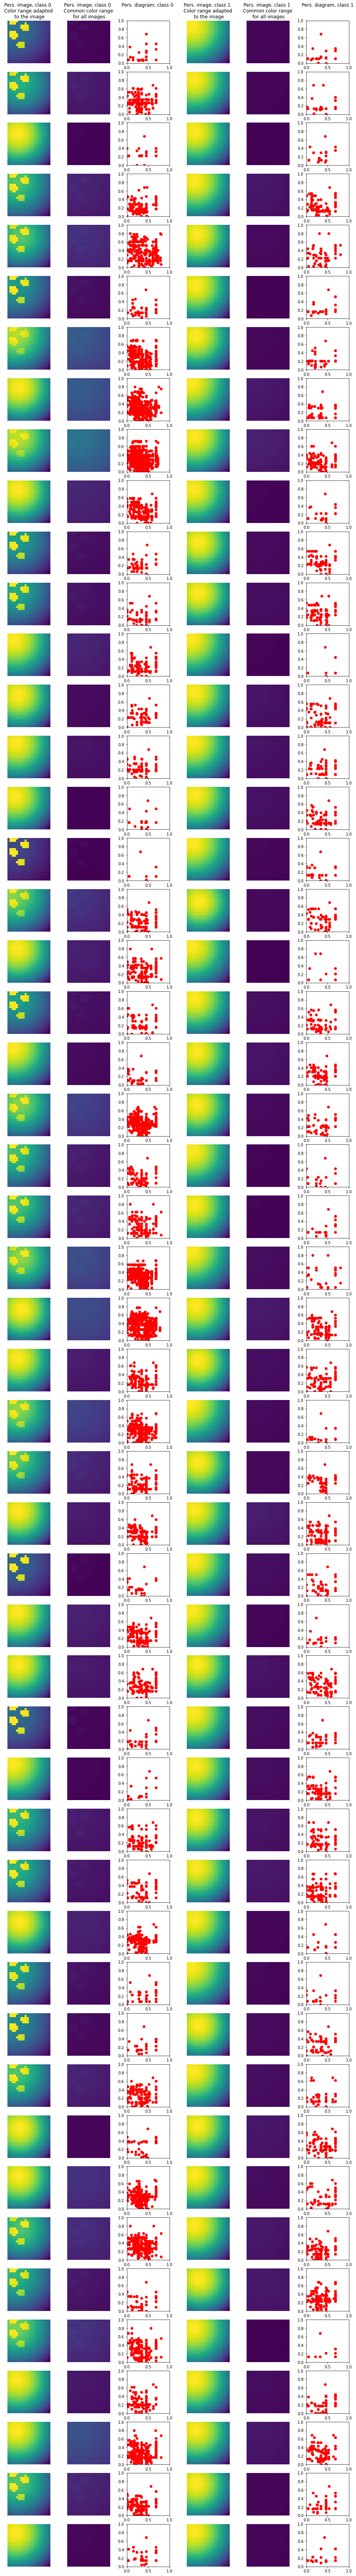

In [13]:
pdiagram_path = "Datasets/WKPI/proteinPDPI/proteinPD/"
pdNum = len(os.listdir(pdiagram_path)) 
persistence_diagrams = [np.loadtxt(pdiagram_path + str(i) + "_PD.pdg") for i in range(pdNum)]

indices0 = np.where(y==0)[0]
indices1 = np.where(y==1)[0]

nb_images=50
vmin = np.min(images)
vmax = np.max(images)
size_image = int(np.sqrt(len(images[0])))
fig,ax = plt.subplots(nb_images,6,figsize=(16,120))
for i in range(nb_images):
    img0 = images[indices0[i]]
    img1 = images[indices1[i]]
    dg0 = persistence_diagrams[indices0[i]]
    dg1 = persistence_diagrams[indices1[i]]
    ax[i,0].axis("off")
    ax[i,0].imshow(img0.reshape((size_image,size_image)))
    ax[i,1].axis("off")
    ax[i,1].imshow(img0.reshape((size_image,size_image)),vmax=vmax,vmin=vmin)
    ax[i,2].axis([0,1,0,1])
    ax[i,2].set_aspect('equal', 'box')
    ax[i,2].plot(*zip(*dg0),"ro")
    ax[i,3].axis("off")
    ax[i,3].imshow(img1.reshape((size_image,size_image)))
    ax[i,4].axis("off")
    ax[i,4].imshow(img1.reshape((size_image,size_image)),vmax=vmax,vmin=vmin)
    ax[i,5].axis([0,1,0,1])
    ax[i,5].set_aspect('equal', 'box')
    ax[i,5].plot(*zip(*dg1),"ro")
ax[0,0].set_title("Pers. image, class 0 \n Color range adapted \n to the image")
ax[0,1].set_title("Pers. image, class 0 \n Common color range \n for all images")
ax[0,2].set_title("Pers. diagram, class 0 \n \n ")
ax[0,3].set_title("Pers. image, class 1 \n Color range adapted \n to the image")
ax[0,4].set_title("Pers. image, class 1 \n Common color range \n for all images")
ax[0,5].set_title("Pers. diagram, class 1\n \n")
plt.show()

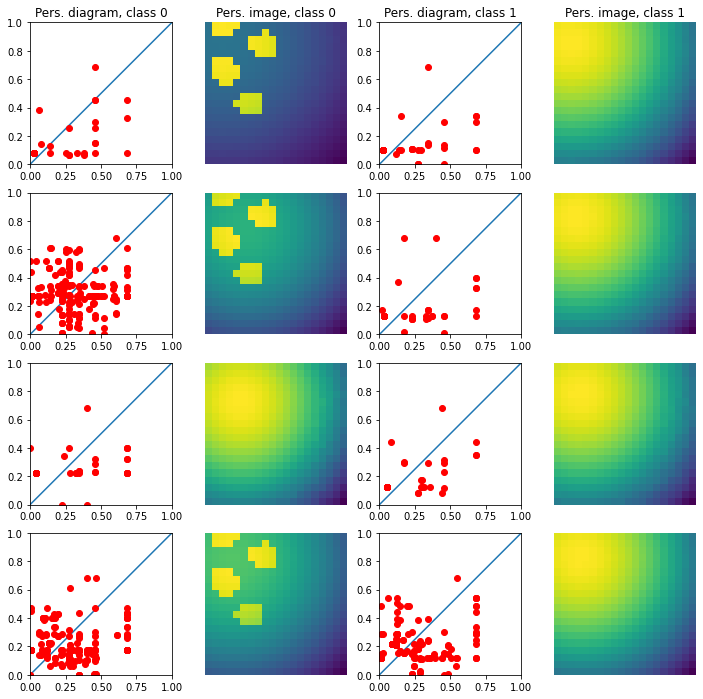

In [9]:
pdiagram_path = "Datasets/WKPI/proteinPDPI/proteinPD/"
pdNum = len(os.listdir(pdiagram_path)) 
persistence_diagrams = [np.loadtxt(pdiagram_path + str(i) + "_PD.pdg") for i in range(pdNum)]

indices0 = np.where(y==0)[0]
indices1 = np.where(y==1)[0]

nb_images=4
vmin = np.min(images)
vmax = np.max(images)
size_image = int(np.sqrt(len(images[0])))
fig,ax = plt.subplots(nb_images,4,figsize=(12,12))
for i in range(nb_images):
    img0 = images[indices0[i]]
    img1 = images[indices1[i]]
    dg0 = persistence_diagrams[indices0[i]]
    dg1 = persistence_diagrams[indices1[i]]
    ax[i,0].axis([0,1,0,1])
    ax[i,0].plot([0,1],[0,1])
    ax[i,0].set_aspect('equal', 'box')
    ax[i,0].plot(*zip(*dg0),"ro")
    ax[i,1].axis("off")
    ax[i,1].imshow(img0.reshape((size_image,size_image)))
    ax[i,2].axis([0,1,0,1])
    ax[i,2].plot([0,1],[0,1])
    ax[i,2].set_aspect('equal', 'box')
    ax[i,2].plot(*zip(*dg1),"ro")
    ax[i,3].axis("off")
    ax[i,3].imshow(img1.reshape((size_image,size_image)))
    
ax[0,0].set_title("Pers. diagram, class 0")
ax[0,1].set_title("Pers. image, class 0")
ax[0,2].set_title("Pers. diagram, class 1")
ax[0,3].set_title("Pers. image, class 1")

plt.show()